In [1]:
import numpy as np 
import pylab
from sklearn.metrics import pairwise_distances
from metrics import get_stress, chen_neighborhood, cluster_distance, cluster_preservation, cluster_preservation2, mahalonobis_metric


In [2]:
def print_metrics(X,d,H,c_ids):
    stress = get_stress(X,d)
    NH = 1-chen_neighborhood(d,X,k=7)
    CD = cluster_distance(H,X,c_ids)
    print(f"Stress is {stress}; NH is {NH}, CD is {CD}")
    return stress, NH, CD

In [3]:
c1 = list()
for i in range(5):
    for j in range(5):
        for k in range(5):
            c1.append([i,j,k])

grid = np.array(c1)
c1 = grid + np.array([5,0,0])
c1.shape

(125, 3)

In [4]:
gen_cluster = lambda s: np.random.normal(scale=s, size=[100,3])

c2 = gen_cluster(1) + np.array([0,10,0])
c3 = (grid*0.25) + np.array([-5,0,0])
c4 = gen_cluster(1)
c5 = gen_cluster(0.25) + np.array([2,1,1]) 



In [5]:
clusters = [c1,c2,c3,c4,c5]

In [6]:
data = np.concatenate(clusters,axis=0)
data.shape

(550, 3)

In [7]:
def label_clusters(sizes):
    return sum([[i] * size for i,size in enumerate(sizes)], [])
sizes = [c.shape[0] for c in clusters]
C = label_clusters(sizes)
data_name = "3d"
c_ids = C


In [8]:
# import pandas as pd
# data = pd.read_csv("palmerpenguins.csv")
# labels, index_map = pd.factorize(data['species'])
# cmap = {0: "red", 
#         1: "blue",
#         2: "orange",
#         3: "tab:red",
#         4: "tab:purple"}

# C = np.array([cmap[c] for c in labels])
# Y = data.drop(['rowid', 'species', 'island', 'year', 'sex'],axis=1).to_numpy()   
# data = Y
# data /= np.max(data,axis=0)
# data_name = "penguins"
# c_ids = labels

In [9]:
# data = np.loadtxt("mnist_test.csv",skiprows=1,delimiter=',')
# data = data[np.random.choice(data.shape[0], 500, replace=False)]
# C = data[:,0]
# c_ids = C.astype(int)
# data = data[:,1:]
# data *= (1/255)
# data_name = "mnist"

In [10]:
d = pairwise_distances(data)
tmp = [[] for _ in np.unique(c_ids)]
[tmp[c].append(i) for i,c in enumerate(c_ids)]
c_ids = tmp

[[ 0.         10.72741395 11.69401556  7.59541114  5.18865711]
 [10.72741395  0.         10.25340933  9.78551425  9.07651527]
 [11.69401556 10.25340933  0.          4.5160469   6.55003842]
 [ 7.59541114  9.78551425  4.5160469   0.          2.49306894]
 [ 5.18865711  9.07651527  6.55003842  2.49306894  0.        ]]

[[ 0.         10.72741395 11.69401556  7.59541114  5.18865711]
 [10.72741395  0.         10.25340933  9.78551425  9.07651527]
 [11.69401556 10.25340933  0.          4.5160469   6.55003842]
 [ 7.59541114  9.78551425  4.5160469   0.          2.49306894]
 [ 5.18865711  9.07651527  6.55003842  2.49306894  0.        ]]
Stress is 2.3506734036273065e-29; NH is 0.0, CD is 8.65704965178335e-33


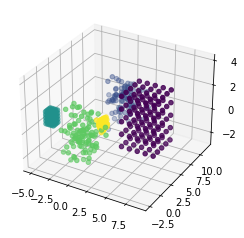

In [11]:
fig = pylab.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data[:,0],data[:,1],data[:,2],c=C)
print_metrics(data,d,data,c_ids)
fig.savefig("figures/3d-og.png")

In [12]:
from sklearn.manifold import TSNE
X = TSNE(perplexity=20,init="pca",learning_rate="auto").fit_transform(data)

/home/jacobmiller1/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [13]:
mahalonobis_metric(data,X,c_ids)

Distance between cluster 1 and cluster 0 in HD is 7.61439155247558
Distance between cluster 0 and cluster 1 in HD is 12.297560978015104
Distance between cluster 2 and cluster 0 in HD is 8.243305618331776
Distance between cluster 0 and cluster 2 in HD is 33.42671658202499
Distance between cluster 2 and cluster 1 in HD is 10.31611842678367
Distance between cluster 1 and cluster 2 in HD is 29.100982071323003
Distance between cluster 3 and cluster 0 in HD is 5.438030236261336
Distance between cluster 0 and cluster 3 in HD is 7.281202816186636
Distance between cluster 3 and cluster 1 in HD is 10.722935559523544
Distance between cluster 1 and cluster 3 in HD is 10.570976035556248
Distance between cluster 3 and cluster 2 in HD is 13.356717126174518
Distance between cluster 2 and cluster 3 in HD is 4.272333479751614
Distance between cluster 4 and cluster 0 in HD is 3.6614617425838185
Distance between cluster 0 and cluster 4 in HD is 22.781168616505852
Distance between cluster 4 and cluster 1 i

[[ 0.         10.72741395 11.69401556  7.59541114  5.18865711]
 [10.72741395  0.         10.25340933  9.78551425  9.07651527]
 [11.69401556 10.25340933  0.          4.5160469   6.55003842]
 [ 7.59541114  9.78551425  4.5160469   0.          2.49306894]
 [ 5.18865711  9.07651527  6.55003842  2.49306894  0.        ]]

[[ 0.         58.27507001 76.29386679 52.01749262 37.10838566]
 [58.27507001  0.         52.29181237 68.29338832 45.99328468]
 [76.29386679 52.29181237  0.         43.31470992 40.04366916]
 [52.01749262 68.29338832 43.31470992  0.         23.69434028]
 [37.10838566 45.99328468 40.04366916 23.69434028  0.        ]]
Stress is 0.3153569086585497; NH is 0.325974025974026, CD is 0.09612972234326458


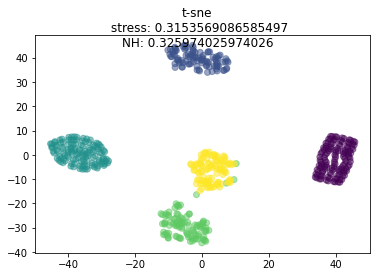

In [14]:
pylab.scatter(X[:,0],X[:,1],c=C,alpha=0.5)
s,n,c = print_metrics(X,d, data,c_ids)
pylab.suptitle(f"t-sne\n stress: {s}\nNH: {n}")
pylab.savefig(f"figures/{data_name}-tsne.png")
t_scores = (s,n,c)

[[ 0.         10.72741395 11.69401556  7.59541114  5.18865711]
 [10.72741395  0.         10.25340933  9.78551425  9.07651527]
 [11.69401556 10.25340933  0.          4.5160469   6.55003842]
 [ 7.59541114  9.78551425  4.5160469   0.          2.49306894]
 [ 5.18865711  9.07651527  6.55003842  2.49306894  0.        ]]

[[ 0.         10.86730342 11.99798375  7.78164049  5.31784105]
 [10.86730342  0.         10.22148533 10.09284977  9.01990829]
 [11.99798375 10.22148533  0.          4.55121845  6.69273033]
 [ 7.78164049 10.09284977  4.55121845  0.          2.59392756]
 [ 5.31784105  9.01990829  6.69273033  2.59392756  0.        ]]
Stress is 0.029906444664002916; NH is 0.5776623376623377, CD is 0.00038863097462956406


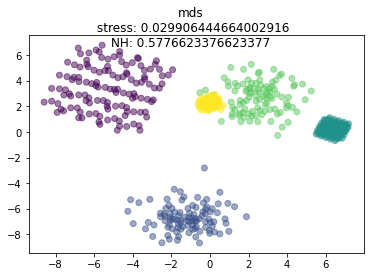

In [15]:
from modules.L2G import L2G
X = L2G(d,weighted=False).solve(100,rep=False)
pylab.scatter(X[:,0],X[:,1],c=C,alpha=0.5)
s,n,c = print_metrics(X,d,data,c_ids)
pylab.suptitle(f"mds\n stress: {s}\nNH: {n}")
pylab.savefig(f"figures/{data_name}-mds.png")
m_scores = (s,n,c)

Stress is 0.2811587194919152; NH is 0.415064935064935, CD is 0.0016363636363636365


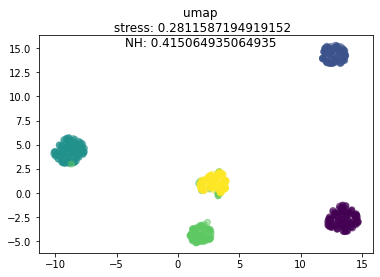

In [118]:
import umap
X = umap.UMAP().fit_transform(data)
pylab.scatter(X[:,0],X[:,1],c=C,alpha=0.5)
s,n,c = print_metrics(X,d,data,c_ids)
pylab.suptitle(f"umap\n stress: {s}\nNH: {n}")
pylab.savefig(f"figures/{data_name}-umap.png")
u_scores = (s,n,c)

In [119]:
def k_nearest(d,k=7):
    
    w = np.zeros_like(d)
    for i in range(w.shape[0]):
        ind = set( np.argsort(d[i])[1:k+1] )
        for j in ind: 
            w[i][j] = 1
            w[j][i] = 1 
    
    return w
        


In [120]:
# d = pairwise_distances(data)
# w = k_nearest(d,k=25)

In [121]:
# X = L2G(d,weighted=True,w=w).solve(100,rep=False)

In [122]:
# pylab.scatter(X[:,0],X[:,1],c=C)
# s,n = print_metrics(X,d)
# pylab.suptitle(f"l2g: knn search (naive); k = 25\n stress: {s}\nNH: {n}")
# pylab.savefig(f"figures/f{data_name}-l2gk25.png")

In [123]:
stress, nh,cd = list(), list(), list()
K = [8,16,32,64,100,150,500]
for k in K:
    w = k_nearest(d,k=k)
    X = L2G(d,weighted=True,w=w).solve(100,rep=False)
    pylab.scatter(X[:,0],X[:,1],c=C,alpha=0.5)
    s,n,c = print_metrics(X,d,data,c_ids)
    stress.append(s)
    nh.append(n)
    cd.append(c)
    pylab.suptitle(f"l2g: knn search (naive); k = {k}\n stress: {s}\nNH: {n}")
    pylab.savefig(f"figures/{data_name}-l2gk{k}.png")    
    pylab.clf()

Stress is 0.5174755157818551; NH is 0.4768831168831169, CD is 0.003454545454545455
Stress is 0.6342863590234965; NH is 0.49636363636363634, CD is 0.0041818181818181815
Stress is 0.42374411706410503; NH is 0.5142857142857142, CD is 0.0023636363636363638
Stress is 0.34533722815859613; NH is 0.568051948051948, CD is 0.0009090909090909091
Stress is 0.36430615016116324; NH is 0.5789610389610389, CD is 0.001090909090909091
Stress is 0.19469133228134172; NH is 0.5885714285714285, CD is 0.0007272727272727273
Stress is 0.0295337548117802; NH is 0.5714285714285714, CD is 0.0


<Figure size 432x288 with 0 Axes>

In [124]:
def diffusion_weights(d,a=5, k = 20, sigma=1):
    #Transform distance matrix
    diff = np.exp( -(d**2) / (sigma **2) )
    diff /= np.sum(diff,axis=0)

    #Sum powers from 1 to a
    mp = np.linalg.matrix_power
    A = sum( pow(0.05,i) * mp(diff,i) for i in range(1,a+1) )

    #Find k largest points for each row 
    Neighbors = set()
    for i in range(diff.shape[0]):
        args = np.argsort(A[i])[::-1][1:k+1]
        for j in args:
            Neighbors.add( (int(i),int(j)) )

    #Set pairs to 1
    w = np.zeros_like(diff)
    for i,j in Neighbors:
        w[i,j] = 1
        w[j,i] = 1
    return w


In [125]:
stress_diff, nh_diff, cd_diff = list(), list(), list()
for k in K:
    w = diffusion_weights(d,10,k=k)
    X = L2G(d,weighted=True,w=w).solve(100,rep=False)
    pylab.scatter(X[:,0],X[:,1],c=C,alpha=0.5)
    s,n,c = print_metrics(X,d,data,c_ids)
    stress_diff.append(s)
    nh_diff.append(n)
    cd_diff.append(c)
    pylab.suptitle(f"l2g: transform distances; k = {k}\n stress: {s}\nNH: {n}")
    pylab.savefig(f"figures/{data_name}-l2gk{k}_diff.png")    
    pylab.clf()


Stress is 0.6082907652839785; NH is 0.5644155844155845, CD is 0.0036363636363636364
Stress is 0.379936426439728; NH is 0.5153246753246754, CD is 0.003272727272727272
Stress is 0.5200839117193099; NH is 0.5062337662337663, CD is 0.0027272727272727275
Stress is 0.40415631248601197; NH is 0.5379220779220779, CD is 0.001090909090909091
Stress is 0.3304187563371813; NH is 0.5909090909090908, CD is 0.0007272727272727273
Stress is 0.21006347616006954; NH is 0.5851948051948053, CD is 0.001090909090909091
Stress is 0.03164823792462379; NH is 0.5605194805194805, CD is 0.0005454545454545455


<Figure size 432x288 with 0 Axes>

In [126]:
x = K
pylab.plot(x,stress,'o-',label="stress")
pylab.plot(x,nh,'o-',label="nh")
pylab.plot(x,cd,'o-',label="cluster_distance")
pylab.suptitle("Stress, nh for l2g w/knn on simple 3d data")
pylab.legend()
pylab.savefig(f"figures/{data_name}_naivecurve.png")
pylab.clf()

<Figure size 432x288 with 0 Axes>

In [127]:
pylab.plot(x,stress_diff,'o-',label="stress")
pylab.plot(x,nh_diff,'o-',label="nh")
pylab.plot(x,cd_diff,'o-',label='cluster_distance')
pylab.suptitle("Stress, nh for l2g transofm distances on simple 3d data")
pylab.legend()
pylab.savefig(f"figures/{data_name}_transformcurve.png")
pylab.clf()

<Figure size 432x288 with 0 Axes>

In [128]:
pylab.plot(x,stress, 'o-', label="L2G w/knn stress")
pylab.plot(x,stress_diff, 'o-',label="L2G w/transform")
pylab.plot(x,[m_scores[0]] * len(x), '--', label="MDS_stress")
pylab.plot(x,[t_scores[0]] * len(x), '--', label="tsne_stress")
pylab.plot(x,[u_scores[0]] * len(x), '--', label="umap_stress")
pylab.suptitle("Stress scores of DR algs")
pylab.legend()
pylab.savefig(f"figures/{data_name}_stress_compare.png")
pylab.clf()


<Figure size 432x288 with 0 Axes>

In [129]:
pylab.plot(x,nh, 'o-', label="L2G w/knn NH")
pylab.plot(x,nh_diff, 'o-',label="L2G w/transform")
pylab.plot(x,[m_scores[1]] * len(x), '--', label="MDS_NH")
pylab.plot(x,[t_scores[1]] * len(x), '--', label="tsne_NH")
pylab.plot(x,[u_scores[1]] * len(x), '--', label="umap_NH")
pylab.suptitle("NH scores of DR algs")
pylab.legend()
pylab.savefig(f"figures/{data_name}_nh_compare.png")
pylab.clf()

<Figure size 432x288 with 0 Axes>

In [130]:
pylab.plot(x,cd, 'o-', label="L2G w/knn cluster distance")
pylab.plot(x,cd_diff, 'o-',label="L2G w/transform cluster distance")
pylab.plot(x,[m_scores[2]] * len(x), '--', label="MDS_cd")
pylab.plot(x,[t_scores[2]] * len(x), '--', label="tsne_cd")
pylab.plot(x,[u_scores[2]] * len(x), '--', label="umap_cd")
pylab.suptitle("cd scores of DR algs")
pylab.legend()
pylab.savefig(f"figures/{data_name}_cd_compare.png")
pylab.clf()


<Figure size 432x288 with 0 Axes>

In [131]:
stress = np.array(stress)
nh = np.array(nh)
stress_diff = np.array(stress_diff)
nh_diff = np.array(nh_diff)

In [132]:
pylab.plot(x,(stress+nh)/2, 'o-', label="L2G w/knn")
pylab.plot(x,(stress_diff+nh_diff)/2, 'o-',label="L2G w/transform ")
pylab.plot(x,[(m_scores[0] + m_scores[1])/2] * len(x), '--', label="MDS_cd")
pylab.plot(x,[(t_scores[0] + t_scores[1])/2] * len(x), '--', label="tsne_cd")
pylab.plot(x,[(u_scores[0] + u_scores[1])/2] * len(x), '--', label="umap_cd")
pylab.suptitle("avg scores of DR algs")
pylab.legend()
pylab.savefig(f"figures/{data_name}_avg_compare.png")
pylab.clf()

<Figure size 432x288 with 0 Axes>

In [133]:
import graph_tool.all as gt
import numpy as np
from sklearn.manifold import TSNE
from modules.L2G import L2G, get_w

bm = sum([[i] * 100 for i in range(9)],list())

A = np.array([ 
    [0.8,0.01,0,0.01,0,0,0,0,0],
    [0.01,0.8,0.01,0,0.01,0,0,0,0],
    [0,0.01,0.8,0,0,0.01,0,0,0],
    [0.01,0,0,0.8,0.01,0,0.01,0,0],
    [0,0.01,0,0.01,0.8,0.01,0,0.01,0],
    [0,0,0.01,0,0.01,0.8,0,0,0.01],
    [0,0,0,0.01,0,0,0.8,0.01,0],
    [0,0,0,0,0.01,0,0.01,0.8,0.01],
    [0,0,0,0,0,0.01,0,0.01,0.8],
])

A[A == 0] = 0.0015

A *= (900 * 3)

def prob(a,b):
    return A[a,b]



In [134]:
# G, bm = gt.random_graph(500, lambda: np.random.poisson(8), directed=False,

#                         model="blockmodel",

#                         block_membership=bm,

#                         edge_probs=prob)



G = gt.generate_sbm(bm, A)

In [135]:
def apsp(G,weights=None):
    d = np.array( [v for v in gt.shortest_distance(G,weights=weights)] ,dtype=float)
    return d

/home/jacobmiller1/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jacobmiller1/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/jacobmiller1/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


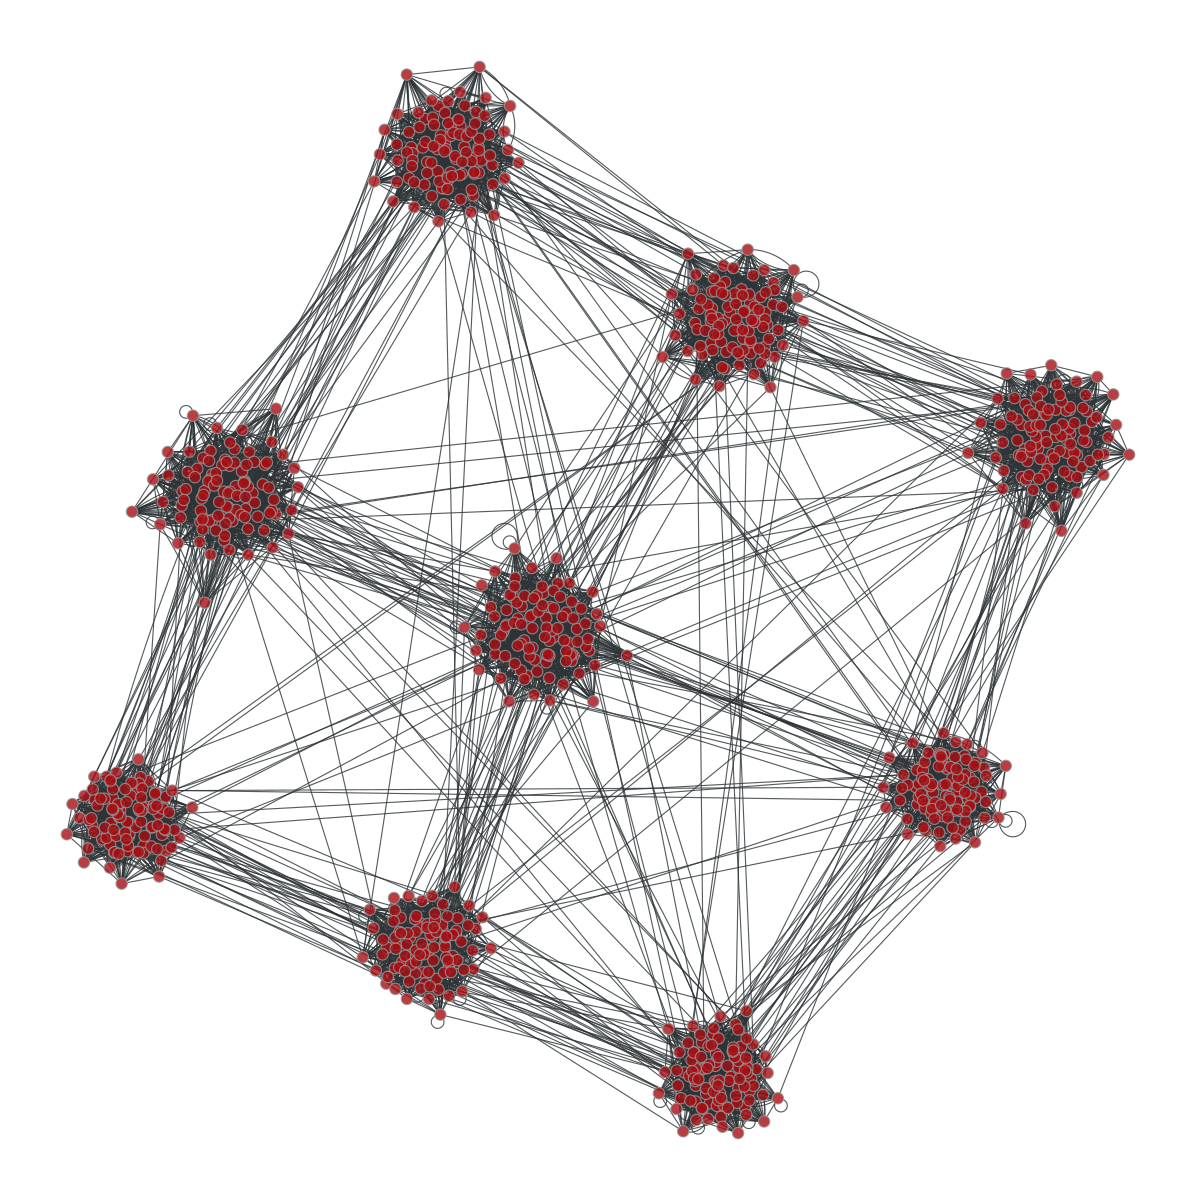

TypeError: print_metrics() missing 2 required positional arguments: 'H' and 'c_ids'

In [136]:
d = apsp(G)
X = TSNE(metric='precomputed',perplexity=20).fit_transform(d)

pos = G.new_vp("vector<float>")
pos.set_2d_array(X.T)
gt.graph_draw(G,pos=pos)
print_metrics(X,d)

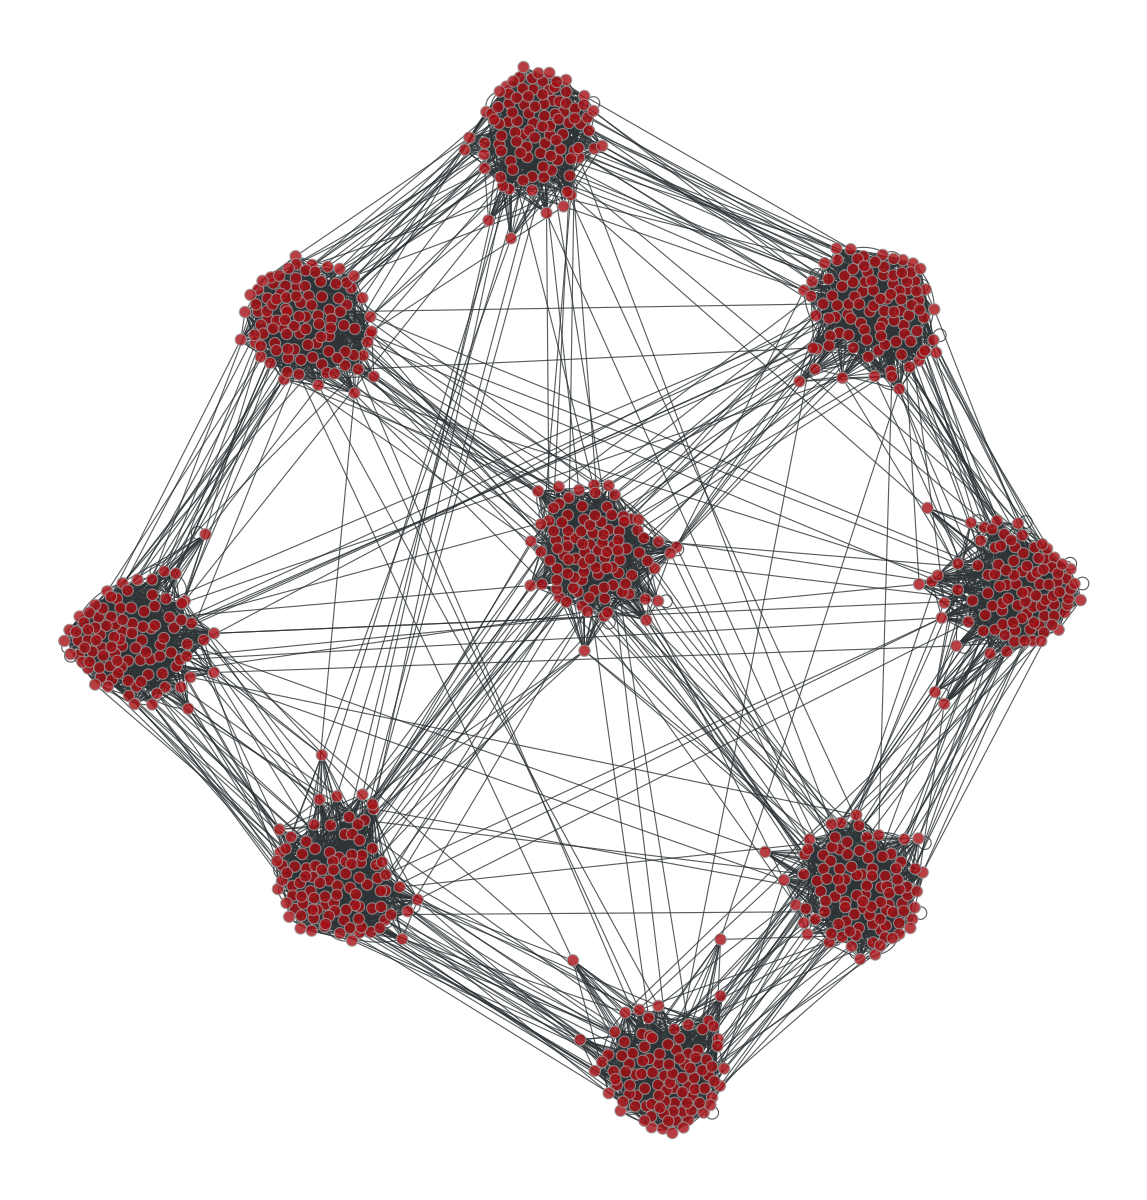

Stress is 0.31154682628177977; NH is 0.20793650793650661


(0.31154682628177977, 0.20793650793650661)

In [ ]:
w = get_w(G,k=50)
w = diffusion_weights(d,k=55)
X = L2G(d,weighted=True,w=w).solve(100,rep=True)

pos = G.new_vp("vector<float>")
pos.set_2d_array(X.T)
gt.graph_draw(G,pos=pos)
print_metrics(X,d)

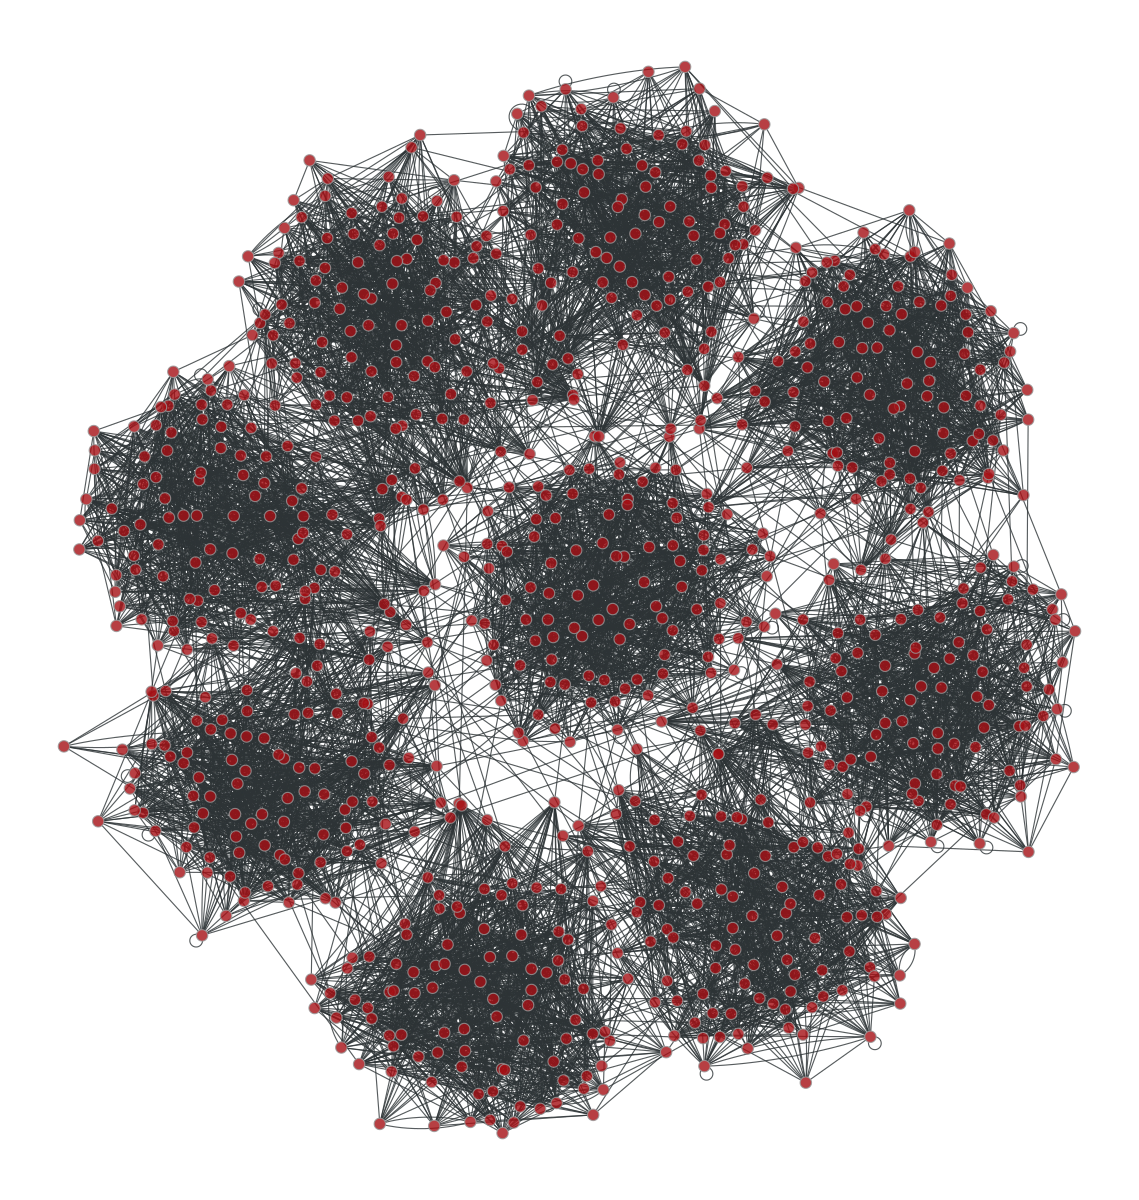

Stress is 0.23717451463429262; NH is 0.13507936507936513


(0.23717451463429262, 0.13507936507936513)

In [ ]:
w = get_w(G,k=50)
X = L2G(d,weighted=False,w=w).solve(100)

pos = G.new_vp("vector<float>")
pos.set_2d_array(X.T)
gt.graph_draw(G,pos=pos)
print_metrics(X,d)

In [ ]:
G.save("graphs/grid_cluster.dot")

In [ ]:
import pandas as pd
data = pd.read_csv("palmerpenguins.csv")
labels, index_map = pd.factorize(data['species'])
cmap = {0: "red", 
        1: "blue",
        2: "orange",
        3: "tab:red",
        4: "tab:purple"}

C = np.array([cmap[c] for c in labels])
Y = data.drop(['rowid', 'species', 'island', 'year', 'sex'],axis=1).to_numpy()   
data = Y
data /= np.max(data,axis=0)
data_name = "penguins"

In [ ]:
c_ids = [[] for _ in set(labels)]
{c_ids[v].append(i) for i,v in enumerate(labels)}


{None}

/home/jacobmiller1/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jacobmiller1/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.20543814830934806


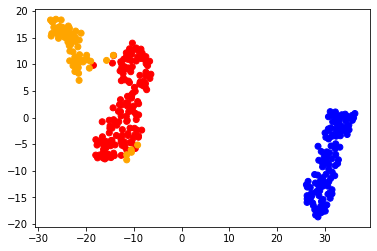

In [ ]:
X = TSNE().fit_transform(data)
pylab.scatter(X[:,0],X[:,1],c=C)

from metrics import cluster_distance
print(cluster_distance(data,X,c_ids))